In [28]:
using LinearAlgebra, Random, MatrixDepot

function Method4b(A, b, m)
    Km = zeros(size(A)[1], m); Km[:,1] = b;
    for i=2:m
        AK_m = A*Km[:, i-1];
        Km[:,i] = normalize(AK_m);
    end
    
    E = eigen((Km'*Km)\(Km'*A*Km));
    eigval = E.values;
    
    return eigval
end

function arnoldi(A, b, m)
    
    n = length(b);
    Q = zeros(n, m+1);
    H = zeros(m+1, m);
    Q[:,1] = b / norm(b);
    
    for k=1:m
        w = A*Q[:,k];
        h, beta, z = DGS(Q, w, k);
        H[1:(k+1), k] = [h; beta];
        
        Q[:, k+1] = z/beta;
    end
    
    E = eigen(H[1:end-1,:]);
    eigval = E.values;
    
    return eigval
end


function DGS(Q, b, k)
    Q = Q[:,1:k];
    
    h = Q'*b;
    z = b - Q*h;
    
    g = Q'*z;
    z = z - Q*g;
    
    h = h + g;
    
    return h, norm(z), z
end
    


DGS (generic function with 1 method)

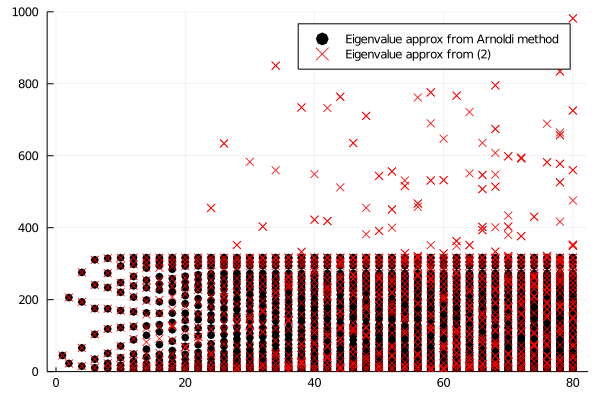

In [48]:
nn=10;
Random.seed!(0)

A=matrixdepot("wathen",nn,nn)
n = size(A)[1]
m=80;
b = randn(n, 1)

using Plots
lambda_Km = real.(Method4b(A, b, 1))
lambda_arnoldi = real.(arnoldi(A, b, 1))

p = plot(ones(size(lambda_arnoldi)), lambda_arnoldi, seriestype = :scatter, marker=:o, color=:black, label="Eigenvalue approx from Arnoldi method")
plot!(p, ones(size(lambda_Km)), lambda_Km, seriestype = :scatter, marker=:x, color=:red, label="Eigenvalue approx from (2)" )
label = "2"
    
for i=2:2:m
    local lambda_Km = real.(Method4b(A, b, i))
    local lambda_arnoldi = real.(arnoldi(A, b, i))
    plot!(p, i*ones(size(lambda_arnoldi)), lambda_arnoldi, seriestype = :scatter, marker=:o, color=:black, label="")
    plot!(p, i*ones(size(lambda_Km)), lambda_Km, seriestype = :scatter, marker=:x, color=:red, label="")
end

ylims!((0,1000))
p